# Text Preprocessing

In [1]:
import nltk
import spacy
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import pandas as pd

In [2]:
pd.options.display.max_colwidth = 200
pd.options.display.max_colwidth = 200

In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
# from google.colab import drive
# # drive.mount('/content/drive')

In [5]:
# path = '/content/drive/MyDrive/mydataset/PPN.csv'

# Read data

In [6]:
df = pd.read_csv("dataset/PPN.csv")
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1873869673743491336,Mon Dec 30 23:54:34 +0000 2024,0,@likromiahooy Paginya ppn naik 12%,1873880391230333420,NaN,likromiahooy,in,NaN,0,0,0,https://x.com/nwotariz/status/1873880391230333420,1313516922353283073,nwotariz
1,1873538051047334049,Mon Dec 30 23:50:29 +0000 2024,2,@AdamVelcro 1. Krn sudah dikondisikan di media kalau kenaikan ppn 12% diinisiasi PDIP. Jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg PDIP. 2. Ini pemerintahan Prabowo. Jadi dia...,1873879360413065392,NaN,AdamVelcro,in,most beautiful place on earth,0,1,0,https://x.com/staysaferek/status/1873879360413065392,932657813930721280,staysaferek
2,1873758639783289310,Mon Dec 30 23:49:49 +0000 2024,0,@exhumaclown rapat ppn krn naik jadi 12% kah?,1873879192255013092,NaN,exhumaclown,in,she/her,0,1,0,https://x.com/ikeulabs/status/1873879192255013092,768414071137775616,ikeulabs
3,1873878259844419990,Mon Dec 30 23:46:06 +0000 2024,0,Apakah ini hari pemborosan sebelum ppn naik 12%?,1873878259844419990,NaN,NaN,in,🇮🇩,1,1,0,https://x.com/flyashh/status/1873878259844419990,997760451592183808,flyashh
4,1873702424453796059,Mon Dec 30 23:33:38 +0000 2024,0,@kompascom Kl pabrik / usaha nya yg memproduksi produk pangan tersebut kena ppn 12% ya berpotensi scr tdk lgs akan naik jg harganya pak..,1873875120198197421,NaN,kompascom,in,NaN,0,0,0,https://x.com/RamsDews/status/1873875120198197421,1714509511883628544,RamsDews


# get subset Text

In [7]:
df = df[['full_text']]

In [8]:
df.head()

,full_text
0,@likromiahooy Paginya ppn naik 12%
1,@AdamVelcro 1. Krn sudah dikondisikan di media kalau kenaikan ppn 12% diinisiasi PDIP. Jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg PDIP. 2. Ini pemerintahan Prabowo. Jadi dia...
2,@exhumaclown rapat ppn krn naik jadi 12% kah?
3,Apakah ini hari pemborosan sebelum ppn naik 12%?
4,@kompascom Kl pabrik / usaha nya yg memproduksi produk pangan tersebut kena ppn 12% ya berpotensi scr tdk lgs akan naik jg harganya pak..


# Case Folding

In [9]:
df['lower_case'] = df['full_text'].str.lower()
df.sample(5)

,full_text,lower_case
71,Bliyaw aga stress krn PPN naik 12 % pindahin ke lapangan upacara RS aja. #TolakKenaikanPPN12Persen #PPNMemperkuatOligarki,bliyaw aga stress krn ppn naik 12 % pindahin ke lapangan upacara rs aja. #tolakkenaikanppn12persen #ppnmemperkuatoligarki
7,Sehari sebelum ppn naik jadi 12%,sehari sebelum ppn naik jadi 12%
79,@dustheria GAMAU!!! TOLONG BANGET DUA HARI LAGI TAHUN BARU HIBURLAH KAMI DARI KENYATAAN PPN YG NAIK JADI 12%‍️,@dustheria gamau!!! tolong banget dua hari lagi tahun baru hiburlah kami dari kenyataan ppn yg naik jadi 12%‍️
199,Polemik PPN Naik Jadi 12 Persen: Ada Petisi Ditandatangani 199 Ribu Orang https://t.co/bl5TIDDufJ,polemik ppn naik jadi 12 persen: ada petisi ditandatangani 199 ribu orang https://t.co/bl5tiddufj
184,@pradipta944 @alamandaflowerr @StefanAntonio__ Peler kalo pinter ngegonggong dong soal situasi akrg ppn naik 12% diem aja. Kalo pemilih 02 iq bagus harusnya bs mikir banyaknya jabatan2 tambahan lu...,@pradipta944 @alamandaflowerr @stefanantonio__ peler kalo pinter ngegonggong dong soal situasi akrg ppn naik 12% diem aja. kalo pemilih 02 iq bagus harusnya bs mikir banyaknya jabatan2 tambahan lu...


# Tokenization

## tweet tokenizer

In [10]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

In [11]:
df['tweet_tokens'] = df['lower_case'].apply(tweet_tokenizer.tokenize)
print("Text:", df['lower_case'][0])
print("tweet tokenizer:", df['tweet_tokens'][0])

Text: @likromiahooy paginya ppn naik 12%
tweet tokenizer: ['paginya', 'ppn', 'naik', '12', '%']


## NLTK


In [12]:
#NLTK
df['tokens_nltk'] = df['lower_case'].apply(lambda x: word_tokenize(x))

In [13]:
print("Text:", df['lower_case'][0])
print("tokenization (nltk):", df['tokens_nltk'][0])

Text: @likromiahooy paginya ppn naik 12%
tokenization (nltk): ['@', 'likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']


## Spacy

In [14]:
nlp = spacy.load("en_core_web_sm")

In [15]:
df['tokens_spacy'] = list(nlp.pipe(df['lower_case']))
df['tokens_spacy'] = df['tokens_spacy'].apply(lambda doc: [token.text for token in doc])

In [16]:
print("Text:", df['lower_case'][0])
print("Tokenization (SpaCy):", df['tokens_spacy'][0])

Text: @likromiahooy paginya ppn naik 12%
Tokenization (SpaCy): ['@likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']


# Stemmner

<a href = "https://github.com/ariaghora/mpstemmer" >[mpstemmer]</a>

In [17]:
# ! pip install --upgrade git+https://github.com/ariaghora/mpstemmer.git
# # !pip install python-Laevenshtein

In [18]:
from mpstemmer import MPStemmer

## NLTK

In [19]:
def stem(tokens_nltk):
    stemmer = MPStemmer()
    stems = [stemmer.stem(word) for word in tokens_nltk]
    return stems

In [20]:
df['stems_nltk'] = df['tokens_nltk'].apply(lambda x: stem(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Stemming:", df['stems_nltk'][0])

Tokenization (NLTK): ['@', 'likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']
Stemming: ['@', 'likromiahooy', 'pagi', 'ppn', 'naik', '12', '%']


## Spacy

In [21]:
df['stems_spacy'] = df['tokens_spacy'].apply(lambda x: stem(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Stemming:", df['stems_spacy'][0])

Tokenization (SpaCy): ['@likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']
Stemming: ['@likromiahooy', 'pagi', 'ppn', 'naik', '12', '%']


## TWeet tokenizer

In [22]:
df['stem_tweet'] = df['tweet_tokens'].apply(lambda x: stem(x))
print("Tokenization (tweet tokenizer):", df['tweet_tokens'][0])
print("Stemming:", df['stem_tweet'][0])

Tokenization (tweet tokenizer): ['paginya', 'ppn', 'naik', '12', '%']
Stemming: ['pagi', 'ppn', 'naik', '12', '%']


# Remove Stopwords

# For NLTK

In [23]:
# Stopword indonesia
stop_words = set(stopwords.words("indonesian"))
print(stop_words)

{'setidak-tidaknya', 'diperlukannya', 'manalagi', 'berakhirnya', 'ikut', 'tuturnya', 'jumlah', 'menyampaikan', 'sebabnya', 'sementara', 'hendaknya', 'masalahnya', 'bagai', 'kamulah', 'namun', 'dimaksudkannya', 'ditunjukkannya', 'sekali', 'pula', 'sering', 'dini', 'sebaliknya', 'berapa', 'sebegitu', 'ditunjuknya', 'mempertanyakan', 'diberikan', 'sudahlah', 'beginikah', 'dikarenakan', 'akhir', 'memungkinkan', 'diingatkan', 'pertanyaan', 'menambahkan', 'sekecil', 'sudahkah', 'dimintai', 'terhadap', 'kelamaan', 'sebut', 'lah', 'kembali', 'setibanya', 'diperlukan', 'terutama', 'hendak', 'itukah', 'sebelum', 'keinginan', 'diperbuat', 'dulu', 'bagaikan', 'menjadi', 'betulkah', 'menjawab', 'seenaknya', 'antar', 'sampai-sampai', 'seketika', 'semisal', 'menanti', 'lamanya', 'sela', 'tiba', 'membuat', 'keseluruhan', 'bersiap', 'selain', 'usah', 'tahun', 'asalkan', 'perlukah', 'menuturkan', 'semuanya', 'sama-sama', 'sekitar', 'adapun', 'berarti', 'tidak', 'mengerjakan', 'sendirinya', 'hari', 'seol

In [24]:
def stop_w(tokens_nltk):
    tokens_filtered = [word for word in tokens_nltk if word.lower() not in stop_words]
    return tokens_filtered

In [25]:
df['remove_stop_words_nltk'] = df['tokens_nltk'].apply(lambda x: stop_w(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Stopword Removal:", df['remove_stop_words_nltk'][0])

Tokenization (NLTK): ['@', 'likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']
Stopword Removal: ['@', 'likromiahooy', 'paginya', 'ppn', '12', '%']


## for spacy

In [26]:
df['remove_stop_words_spacy'] = df['tokens_spacy'].apply(lambda x: stop_w(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Stopword Removal:", df['remove_stop_words_spacy'][0])

Tokenization (SpaCy): ['@likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']
Stopword Removal: ['@likromiahooy', 'paginya', 'ppn', '12', '%']


## for tweet tokenizer

In [27]:
df['remove_stop_words_tweet_tokenizer'] = df['tweet_tokens'].apply(lambda x: stop_w(x))
print("Tokenization (tweet tokenizer):", df['tokens_spacy'][0])
print("Stopword Removal:", df['remove_stop_words_tweet_tokenizer'][0])

Tokenization (tweet tokenizer): ['@likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']
Stopword Removal: ['paginya', 'ppn', '12', '%']


# Word Cloud

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

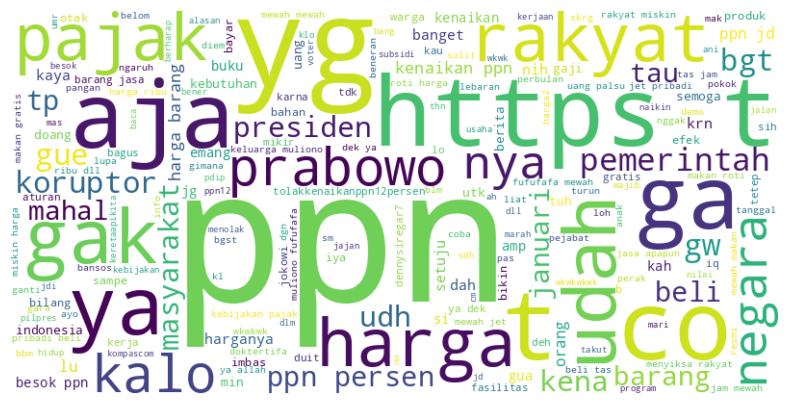

In [29]:
all_text = " ".join([" ".join(words) for words in df['remove_stop_words_nltk']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


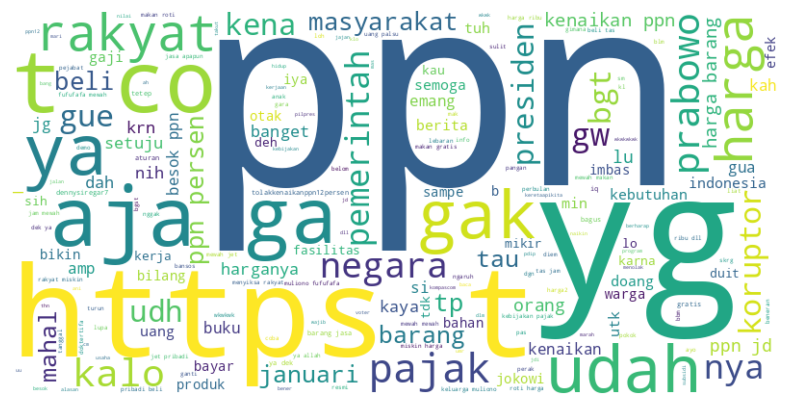

In [30]:
all_text = " ".join([" ".join(words) for words in df['remove_stop_words_spacy']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

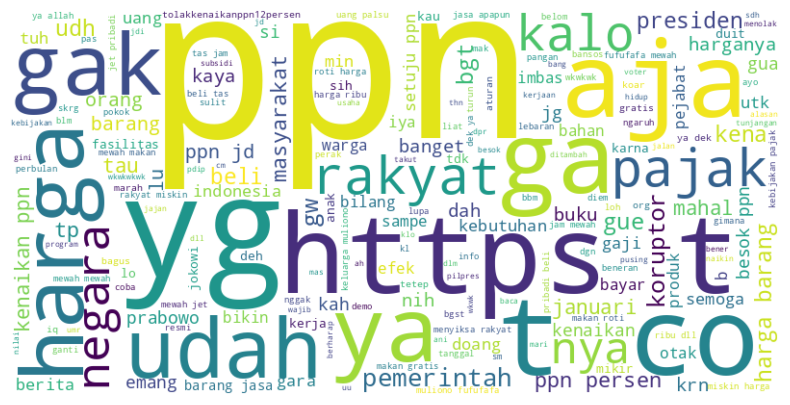

In [31]:
all_text = " ".join([" ".join(words) for words in df['remove_stop_words_tweet_tokenizer']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
df.to_csv('dataset/PPN_preprocessed.csv', index=False)